**Quantitative Finance - Technical Analysis to VaR uisng US and Denmark Stocks**

In [80]:
!pip install ffn
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
import pandas_datareader.data as web
import ffn
import plotly.express as px
import yfinance as yf

In [82]:
Microsoft = yf.Ticker("MSFT").history(period='5y')
Apple= yf.Ticker("AAPL").history(period='5y')
MSFT=Microsoft['Close']
AAPL= Apple['Close']
JPMorgan= yf.Ticker("JPM").history(period='5y')
JPM= JPMorgan['Close']

In [83]:
AAPL.mean()

93.3783468419304

In [84]:
AAPL.median()

78.15975189208984

In [85]:
MSFT.mode()

0      78.160065
1      78.977562
2      90.136482
3      96.111252
4      98.761711
5     101.551018
6     101.864830
7     102.230194
8     104.812965
9     106.860039
10    131.962708
11    133.616623
12    134.199570
13    134.509567
14    135.151794
15    153.462494
16    204.149078
17    215.854950
18    234.240005
19    242.119995
20    253.541840
21    292.401123
22    298.171173
dtype: float64

In [86]:
MSFT.describe()

count    1258.000000
mean      184.967318
std        77.769425
min        76.569435
25%       107.264206
50%       178.433739
75%       253.185093
max       340.882812
Name: Close, dtype: float64

In [87]:
msft_return= MSFT.pct_change(1)
aapl_return= AAPL.pct_change(1)

In [88]:
bins= 1+3.322* np.log(1259)
bins

24.71267861909532

In [89]:
msft_return.skew()
aapl_return.skew()

-0.11922657926561224

In [90]:
msft_return.kurtosis()

7.219430887738071

In [91]:
msft_return.var()

0.0003664546716220086

In [92]:
msft_return.std()

0.01914300581470968

In [93]:
stock= pd.concat([msft_return, aapl_return],axis=1)
stock.columns= ['MSFT_return','AAPL_return']
stock

,MSFT_return,AAPL_return
Date,,
2017-10-27 00:00:00-04:00,NaN,NaN
2017-10-30 00:00:00-04:00,0.000954,0.022509
2017-10-31 00:00:00-04:00,-0.008463,0.013915
2017-11-01 00:00:00-04:00,0.000000,-0.012719
2017-11-02 00:00:00-04:00,0.010459,0.007310
...,...,...
2022-10-20 00:00:00-04:00,-0.001395,-0.003267
2022-10-21 00:00:00-04:00,0.025281,0.027059
2022-10-24 00:00:00-04:00,0.021188,0.014803


In [94]:
stock.cov()

,MSFT_return,AAPL_return
MSFT_return,0.000366,0.000301
AAPL_return,0.000301,0.000424


In [95]:
stock.cov()*252

,MSFT_return,AAPL_return
MSFT_return,0.092347,0.075750
AAPL_return,0.075750,0.106769


In [96]:
stock.corr()

,MSFT_return,AAPL_return
MSFT_return,1.000000,0.762867
AAPL_return,0.762867,1.000000


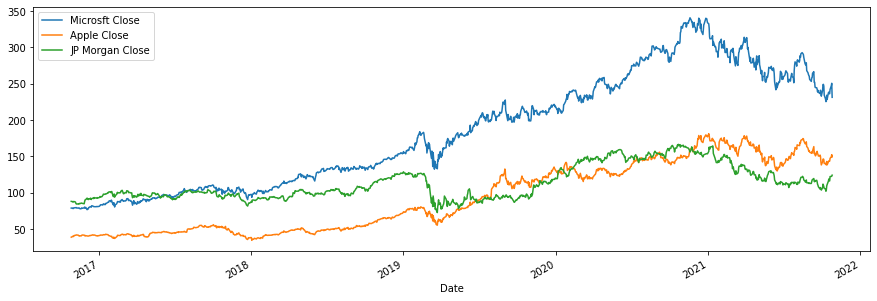

In [97]:
MSFT.plot(label='Microsft Close', figsize=(15,5))
AAPL.plot(label='Apple Close', figsize=(15,5))
JPM.plot(label='JP Morgan Close', figsize=(15,5))

plt.legend()

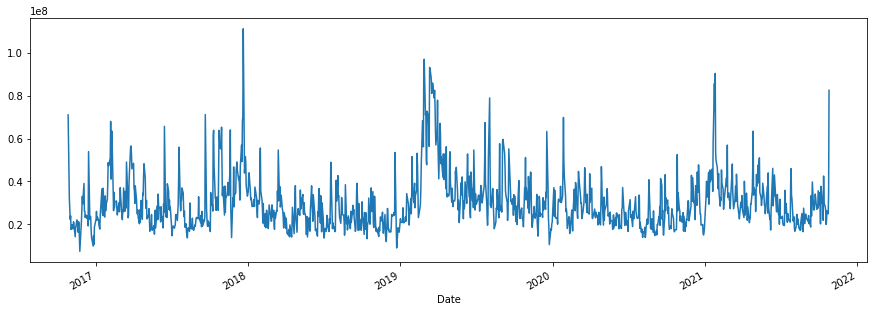

In [98]:
Microsoft['Volume'].plot(label='Microsft Volume', figsize=(15,5))

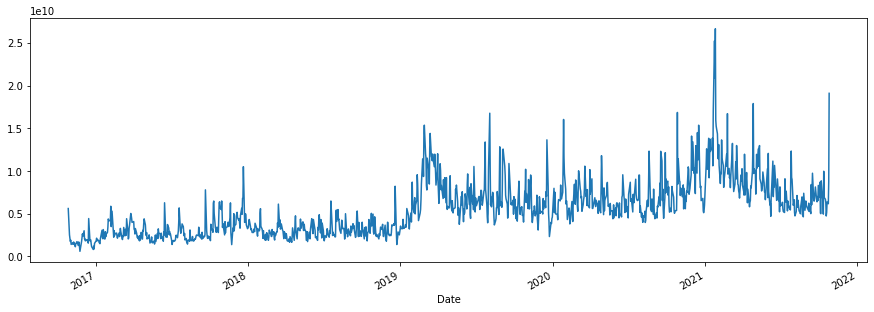

In [99]:
Microsoft_ttl_trded= Microsoft['Volume']* Microsoft['Close']

Microsoft_ttl_trded.plot(label='Microsft Total Traded', figsize=(15,5))

In [100]:
Apple_ttl_traded= Apple['Close']* Apple['Volume']

In [101]:
Morgan_ttl_traded= JPMorgan['Close']* JPMorgan['Volume']

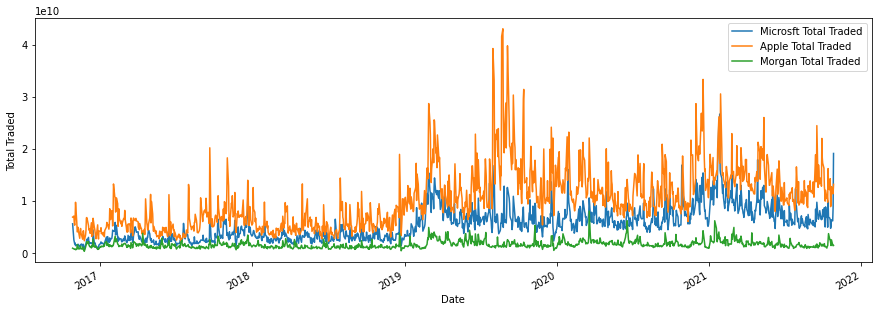

In [102]:
Microsoft_ttl_trded.plot(label='Microsft Total Traded', figsize=(15,5))
Apple_ttl_traded.plot(label='Apple Total Traded', figsize=(15,5))
Morgan_ttl_traded.plot(label='Morgan Total Traded', figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Total Traded')
plt.legend()

In [103]:
MSFT_MA_50=Microsoft['Close'].rolling(50).mean()
AAPL_MA_50=Apple['Close'].rolling(50).mean()
JPM_MA_50=JPMorgan['Close'].rolling(50).mean()
MSFT_MA_100=Microsoft['Close'].rolling(100).mean()
AAPL_MA_100=Apple['Close'].rolling(100).mean()
JPM_MA_100=JPMorgan['Close'].rolling(100).mean()
MSFT_MA_200=Microsoft['Close'].rolling(200).mean()
AAPL_MA_200=Apple['Close'].rolling(200).mean()
JPM_MA_200=JPMorgan['Close'].rolling(200).mean()

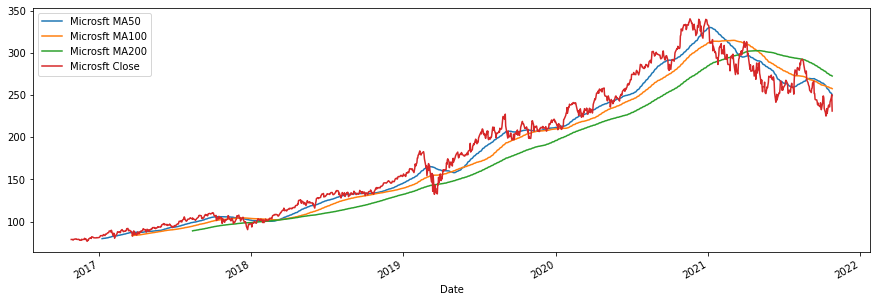

In [104]:
MSFT_MA_50.plot(label='Microsft MA50', figsize=(15,5))
MSFT_MA_100.plot(label='Microsft MA100', figsize=(15,5))
MSFT_MA_200.plot(label='Microsft MA200', figsize=(15,5))
MSFT.plot(label='Microsft Close', figsize=(15,5))
plt.legend()

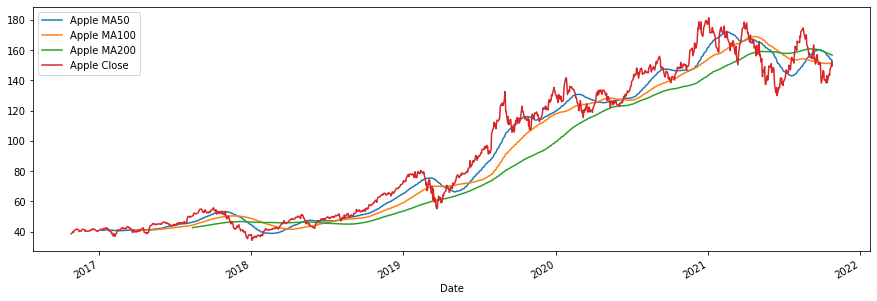

In [105]:
AAPL_MA_50.plot(label='Apple MA50', figsize=(15,5))
AAPL_MA_100.plot(label='Apple MA100', figsize=(15,5))
AAPL_MA_200.plot(label='Apple MA200', figsize=(15,5))
AAPL.plot(label='Apple Close', figsize=(15,5))
plt.legend()

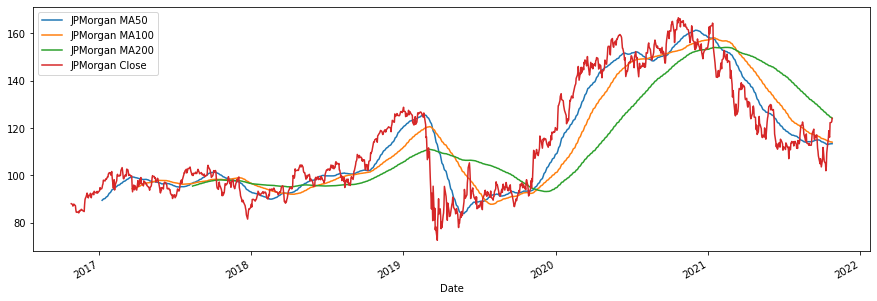

In [106]:
JPM_MA_50.plot(label='JPMorgan MA50', figsize=(15,5))
JPM_MA_100.plot(label='JPMorgan MA100', figsize=(15,5))
JPM_MA_200.plot(label='JPMorgan MA200', figsize=(15,5))
JPM.plot(label='JPMorgan Close', figsize=(15,5))
plt.legend()

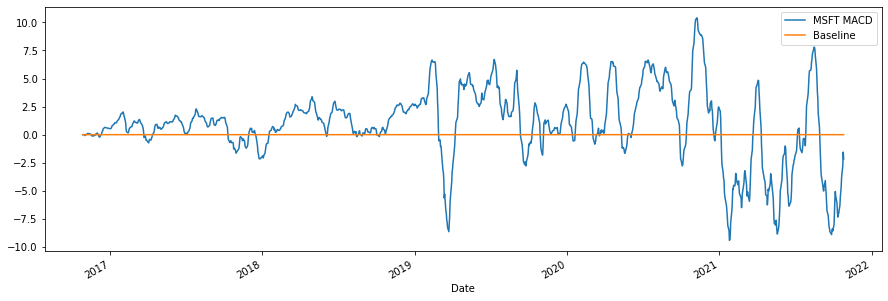

In [107]:
Microsoft['MACD']= Microsoft['Close'].ewm(span=12, adjust=False).mean()-  Microsoft['Close'].ewm(span=26, adjust=False).mean()
Microsoft['Baseline']=0

Microsoft['MACD'].plot(label='MSFT MACD', figsize=(15,5))
Microsoft['Baseline'].plot(label='Baseline')
plt.legend()

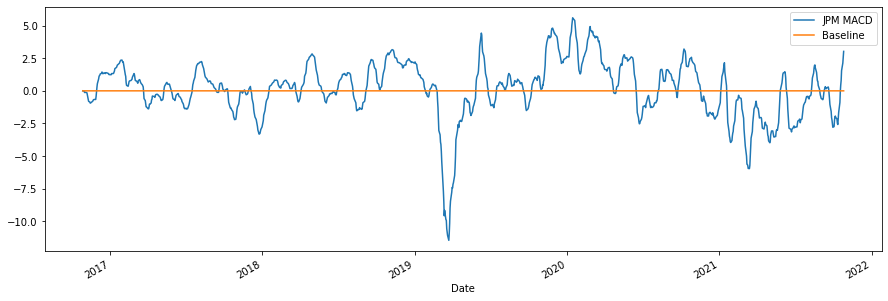

In [108]:
JPMorgan['MACD']= JPMorgan['Close'].ewm(span=12, adjust=False).mean()-  JPMorgan['Close'].ewm(span=26, adjust=False).mean()
JPMorgan['Baseline']=0

JPMorgan['MACD'].plot(label='JPM MACD', figsize=(15,5))
JPMorgan['Baseline'].plot(label='Baseline')
plt.legend()

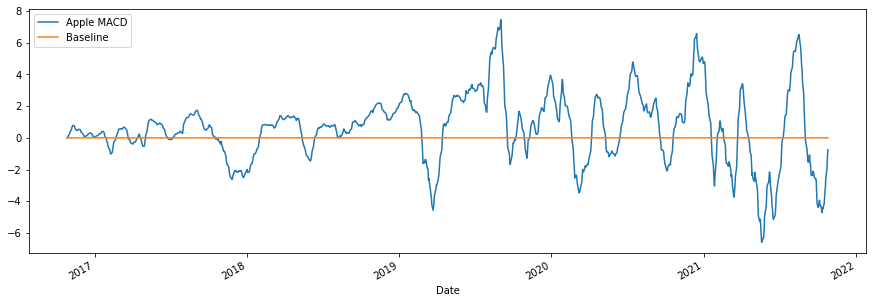

In [109]:
Apple['MACD']= Apple['Close'].ewm(span=12, adjust=False).mean()-  Apple['Close'].ewm(span=26, adjust=False).mean()
Apple['Baseline']=0

Apple['MACD'].plot(label='Apple MACD', figsize=(15,5))
Apple['Baseline'].plot(label='Baseline')
plt.legend()

In [110]:
window_of_days= 20
number_std=2

In [111]:
rolling_mean= Microsoft['Close'].rolling(window_of_days).mean()
rolling_std= Microsoft['Close'].rolling(window_of_days).std()

In [112]:
Microsoft['Rolling_Mean']= rolling_mean
Microsoft['Bollinger_High']= rolling_mean+ rolling_std*number_std
Microsoft['Bolling_low']= rolling_mean- rolling_std*number_std

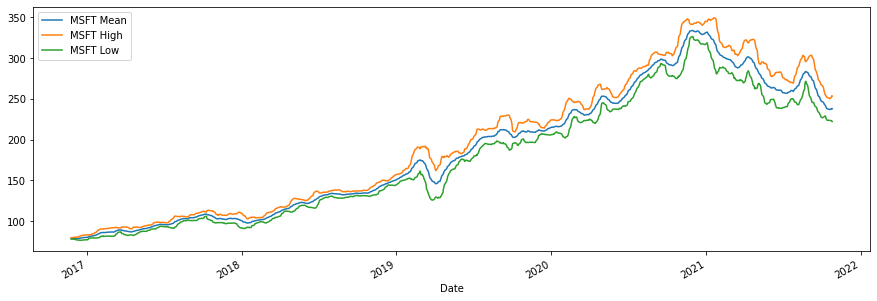

In [113]:
Microsoft['Rolling_Mean'].plot(label='MSFT Mean', figsize=(15,5))
Microsoft['Bollinger_High'].plot(label='MSFT High', figsize=(15,5))
Microsoft['Bolling_low'].plot(label='MSFT Low', figsize=(15,5))
plt.legend()

In [114]:
import yfinance as yf
etf = ['DANSKE.CO','NDA-DK.CO','NVO','VWS.CO'] #and any tickers you'd add to be retrived
Stock = yf.download(tickers=etf, period='5y')
Portfolio=Stock['Close']
#Danske Bank A/S, Nordea Bank Abp, Novo Nordisk A/, Vestas Wind Systems A/S

[*********************100%***********************]  4 of 4 completed


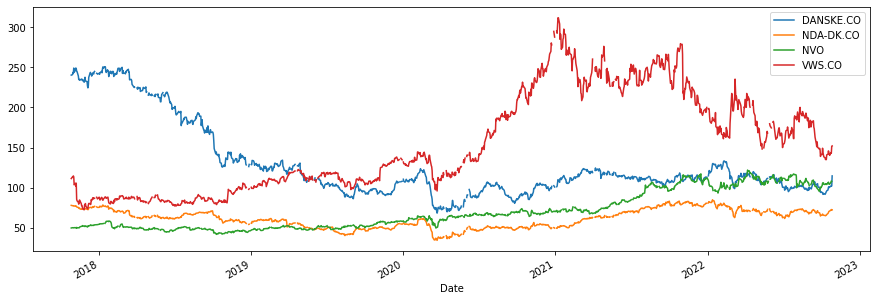

In [115]:
Portfolio.plot(label='Danmark stocks Close', figsize=(15,5))
plt.legend()

In [116]:
Portfolio_return= Portfolio/Portfolio.shift(1)
Portfolio_return

,DANSKE.CO,NDA-DK.CO,NVO,VWS.CO
Date,,,,
2017-10-27,NaN,NaN,NaN,NaN
2017-10-30,1.002496,0.994212,1.007273,1.018885
2017-10-31,1.011203,0.996766,0.998596,0.994704
2017-11-01,0.995076,1.000649,0.997992,1.015972
2017-11-02,1.027629,1.002594,0.998994,0.990393
...,...,...,...,...
2022-10-21,1.005805,1.005398,1.001538,0.988856
2022-10-24,1.015423,1.013422,1.022261,1.022825
2022-10-25,0.995590,1.011989,1.015299,0.997211


In [117]:
Portfolio_Cov= Portfolio_return.cov()
Portfolio_Cov

,DANSKE.CO,NDA-DK.CO,NVO,VWS.CO
DANSKE.CO,0.000415,0.000236,0.000041,0.000156
NDA-DK.CO,0.000236,0.000322,0.000032,0.000128
NVO,0.000041,0.000032,0.000283,0.000086
VWS.CO,0.000156,0.000128,0.000086,0.000765


In [118]:
annualised_cov= Portfolio_Cov*252
annualised_cov

,DANSKE.CO,NDA-DK.CO,NVO,VWS.CO
DANSKE.CO,0.104641,0.059444,0.010325,0.039424
NDA-DK.CO,0.059444,0.081141,0.008052,0.032244
NVO,0.010325,0.008052,0.071221,0.021584
VWS.CO,0.039424,0.032244,0.021584,0.192864


In [119]:
covariance_mkt= annualised_cov.iloc[0,1]
covariance_mkt

0.059444062558895096

In [120]:
portfolio_weights= np.array([0.25,0.25,0.25,0.25])

In [121]:
portfolio_return_weighted= Portfolio_return.mul(portfolio_weights, axis=1)
portfolio_return_weighted

,DANSKE.CO,NDA-DK.CO,NVO,VWS.CO
Date,,,,
2017-10-27,NaN,NaN,NaN,NaN
2017-10-30,0.250624,0.248553,0.251818,0.254721
2017-10-31,0.252801,0.249191,0.249649,0.248676
2017-11-01,0.248769,0.250162,0.249498,0.253993
2017-11-02,0.256907,0.250649,0.249748,0.247598
...,...,...,...,...
2022-10-21,0.251451,0.251349,0.250384,0.247214
2022-10-24,0.253856,0.253355,0.255565,0.255706
2022-10-25,0.248898,0.252997,0.253825,0.249303


In [122]:
Portfolio_return['Portfolio']= portfolio_return_weighted.sum(axis=1).dropna()
Portfolio_return

,DANSKE.CO,NDA-DK.CO,NVO,VWS.CO,Portfolio
Date,,,,,
2017-10-27,NaN,NaN,NaN,NaN,0.000000
2017-10-30,1.002496,0.994212,1.007273,1.018885,1.005716
2017-10-31,1.011203,0.996766,0.998596,0.994704,1.000317
2017-11-01,0.995076,1.000649,0.997992,1.015972,1.002422
2017-11-02,1.027629,1.002594,0.998994,0.990393,1.004902
...,...,...,...,...,...
2022-10-21,1.005805,1.005398,1.001538,0.988856,1.000399
2022-10-24,1.015423,1.013422,1.022261,1.022825,1.018482
2022-10-25,0.995590,1.011989,1.015299,0.997211,1.005022


In [123]:
tickers='^OMXC25'
OMXC25 = yf.download(tickers=tickers, period='5y')
Portfolio_return['Benchmark']= OMXC25['Close']
#OMX Copenhagen 25 Index

[*********************100%***********************]  1 of 1 completed


In [124]:
Portfolio_return['Benchmark']= Portfolio_return['Benchmark'].pct_change(1).dropna()
Portfolio_return= Portfolio_return.dropna()

In [125]:
Portfolio_return['RF Rate']=0.073
Portfolio_return

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DANSKE.CO,NDA-DK.CO,NVO,VWS.CO,Portfolio,Benchmark,RF Rate
Date,,,,,,,
2017-10-30,1.002496,0.994212,1.007273,1.018885,1.005716,0.005983,0.073
2017-10-31,1.011203,0.996766,0.998596,0.994704,1.000317,0.000100,0.073
2017-11-01,0.995076,1.000649,0.997992,1.015972,1.002422,0.000887,0.073
2017-11-02,1.027629,1.002594,0.998994,0.990393,1.004902,-0.011223,0.073
2017-11-03,0.979133,0.993532,1.006043,0.911817,0.972631,-0.011435,0.073
...,...,...,...,...,...,...,...
2022-10-20,0.988817,1.004996,0.994742,0.981992,0.992637,-0.000378,0.073
2022-10-21,1.005805,1.005398,1.001538,0.988856,1.000399,-0.011377,0.073
2022-10-24,1.015423,1.013422,1.022261,1.022825,1.018482,0.021559,0.073


In [126]:
Covariance_portfolio=Portfolio_return.cov()*252

In [127]:
covariance_market= Covariance_portfolio.iloc[3,4]
covariance_market

0.07292548567567074

In [128]:
Market_variance= Portfolio_return['Benchmark'].var()*252
Market_variance

0.03601603947630159

In [129]:
portfolio_beta= covariance_market/Market_variance
portfolio_beta

2.0248058014167665

In [130]:
Portfolio_return_mean= Portfolio_return['Portfolio'].mean()

In [131]:
risk_free_rate= 0.073

In [132]:
alpha= Portfolio_return -( risk_free_rate+portfolio_beta*(Portfolio_return-risk_free_rate))
alpha

,DANSKE.CO,NDA-DK.CO,NVO,VWS.CO,Portfolio,Benchmark,RF Rate
Date,,,,,,,
2017-10-30,-0.952553,-0.944064,-0.957448,-0.969348,-0.955853,0.068679,0.0
2017-10-31,-0.961476,-0.946681,-0.948556,-0.944568,-0.950320,0.074708,0.0
2017-11-01,-0.944949,-0.950660,-0.947937,-0.966363,-0.952477,0.073902,0.0
2017-11-02,-0.978309,-0.952653,-0.948964,-0.940150,-0.955019,0.086312,0.0
2017-11-03,-0.928611,-0.943366,-0.956188,-0.859624,-0.921947,0.086529,0.0
...,...,...,...,...,...,...,...
2022-10-20,-0.938535,-0.955115,-0.944607,-0.931540,-0.942449,0.075198,0.0
2022-10-21,-0.955944,-0.955527,-0.951571,-0.938575,-0.950404,0.086470,0.0
2022-10-24,-0.965800,-0.963750,-0.972808,-0.973386,-0.968936,0.052717,0.0


In [133]:
Portfolio_return['Portfolio']= Portfolio_return['Portfolio']
Portfolio_return

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DANSKE.CO,NDA-DK.CO,NVO,VWS.CO,Portfolio,Benchmark,RF Rate
Date,,,,,,,
2017-10-30,1.002496,0.994212,1.007273,1.018885,1.005716,0.005983,0.073
2017-10-31,1.011203,0.996766,0.998596,0.994704,1.000317,0.000100,0.073
2017-11-01,0.995076,1.000649,0.997992,1.015972,1.002422,0.000887,0.073
2017-11-02,1.027629,1.002594,0.998994,0.990393,1.004902,-0.011223,0.073
2017-11-03,0.979133,0.993532,1.006043,0.911817,0.972631,-0.011435,0.073
...,...,...,...,...,...,...,...
2022-10-20,0.988817,1.004996,0.994742,0.981992,0.992637,-0.000378,0.073
2022-10-21,1.005805,1.005398,1.001538,0.988856,1.000399,-0.011377,0.073
2022-10-24,1.015423,1.013422,1.022261,1.022825,1.018482,0.021559,0.073


In [134]:
var99= np.percentile(Portfolio_return['Portfolio'],1)
var99

0.9629427253670063